In [31]:
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 64

# load and normalize MNIST
transform = transforms.Compose(
    [transforms.ToTensor()])#,
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')



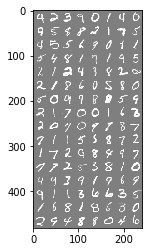

    4     2     3     9


torch.Size([128, 1, 28, 28])

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
images.shape

In [28]:
# Define the network
import torch.nn as nn
import torch.nn.functional as F

# use_gpu = torch.cuda.is_available()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # flatten 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    
#### initialisation sample   

def weights_init(m):
    classname = m.__class__.__name__
    print(classname)
    if classname.find('Conv2d') != -1:
        #print(m.weight.data.shape, m.bias.data.shape)
        nn.init.normal_(m.weight.data, 0.0, 1.0)
        nn.init.constant_(m.bias.data, 0.0)
        # bias is the term in wx + b
    elif classname.find('Linear') != -1:
        nn.init.normal_(m.weight.data, 0.0, 1.0)
        nn.init.constant_(m.bias.data, 0.0)

    # uniform distribution
    #nn.init.uniform_(tensor, a=0, b=1)
    
    #normal distribution
    #nn.init.normal_(tensor, mean=0, std=1)
    #.........
net = Net()
    
print(net)
#net.apply(weights_init)

Net(
  (fc1): Linear(in_features=784, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=10, bias=True)
)


In [56]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0)
max_epoch = 50

for epoch in range(max_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
#         if use_gpu:
#             inputs = inputs.cuda()
#             labels = labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # backpropagation of the weights of linear layers as well as the convolutional layers
        optimizer.step() # dynamic learning rate

        # print statistics
        running_loss += loss.item()
        if i % 400 == 399:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   400] loss: 0.048
[1,   800] loss: 0.048
[2,   400] loss: 0.047
[2,   800] loss: 0.047
[3,   400] loss: 0.047
[3,   800] loss: 0.048
[4,   400] loss: 0.046
[4,   800] loss: 0.048
[5,   400] loss: 0.047
[5,   800] loss: 0.046
[6,   400] loss: 0.046
[6,   800] loss: 0.048
[7,   400] loss: 0.047
[7,   800] loss: 0.045
[8,   400] loss: 0.045
[8,   800] loss: 0.047
[9,   400] loss: 0.046
[9,   800] loss: 0.045
[10,   400] loss: 0.045
[10,   800] loss: 0.046
[11,   400] loss: 0.046
[11,   800] loss: 0.045
[12,   400] loss: 0.043
[12,   800] loss: 0.047
[13,   400] loss: 0.045
[13,   800] loss: 0.045
[14,   400] loss: 0.044
[14,   800] loss: 0.046
[15,   400] loss: 0.044
[15,   800] loss: 0.046
[16,   400] loss: 0.045
[16,   800] loss: 0.045
[17,   400] loss: 0.044
[17,   800] loss: 0.045
[18,   400] loss: 0.044
[18,   800] loss: 0.043
[19,   400] loss: 0.043
[19,   800] loss: 0.045
[20,   400] loss: 0.044
[20,   800] loss: 0.044
[21,   400] loss: 0.044
[21,   800] loss: 0.044
[22,   400

In [118]:
correct = 0
total = 0
flag = True
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if (flag):
#             print(images)
            single_input = images
            print(images.shape)
            print('------------------------')
            print(labels.shape)
            lable = labels
            flag = False
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

torch.Size([64, 1, 28, 28])
------------------------
torch.Size([64])
Accuracy of the network on the 10000 test images: 93 %


In [122]:
single_input_list = single_input[0][0].tolist()
print(single_input_list)
print(lable[0])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0,

In [46]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([8, 784])
fc1.bias 	 torch.Size([8])
fc2.weight 	 torch.Size([8, 8])
fc2.bias 	 torch.Size([8])
fc3.weight 	 torch.Size([8, 8])
fc3.bias 	 torch.Size([8])
fc4.weight 	 torch.Size([10, 8])
fc4.bias 	 torch.Size([10])


In [60]:
torch.save(net.state_dict(), "./datasets/nn1.pkl")

In [143]:
# save parameters as json file
# {
#   "layers": [2,2,1],
#   "input": [0.0, 0.0],
#   "expectedOutput": [0.0],
#   "weights": {
#     "1": [[1.0,1.0],[1.0,1.0]],
#     "2": [[1.0], [-2.0]]
#   },
#   "biases": {
#     "1": [[0.0], [-1.0]],
#     "2": [[0.0]]
#   }
# }
import json

# output = json.dumps(net.state_dict()["fc1.weight"].tolist())
output = {}

output['layers'] = [784, 8, 8, 8, 10] # [input, hidden layers, ..., output]

output_input = []
for i in range(28):
    for j in range(28):
        output_input.append(single_input_list[i][j])
output['input'] = output_input

output_expectedOutput = np.zeros(10)
output_expectedOutput[lable.tolist()[0]] = 1
output['expectedOutput'] = output_expectedOutput.tolist()

output_weights = {}
output_biases = {}
i = 1
for param_tensor in net.state_dict():
    if ('weight' in param_tensor):
        output_weights[str(i)] =  net.state_dict()[param_tensor].tolist()
    if ('bias' in param_tensor):
        output_biases[str(i)] = net.state_dict()[param_tensor].tolist()
        i += 1
output['weights'] = output_weights
output['biases'] = output_biases

with open('./datasets/nn1.json', 'w') as f:
    json.dump(output, f)


In [146]:
np.shape(output_weights['1'])

(8, 784)